# Hypothesis Testing
## Data Analytics Activity W8

*Carreon, Ma. Addine Anne T.* | *B37* | *01/20/2024*

### Instructions

Using the given dataset provided, perform the following tasks using the given libraries specified below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Dataset Details

A telecommunications network provided a sample of their customer data containing details whether the person churned i.e. stopped using their subscription services or not. Subscription-related information is provided as well as the demographics for each customer. You are advised to perform statistical tests to provide interesting results.

In [2]:
telecom_data = pd.read_csv('telecom_users.csv')

In [3]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


### Rubrics (For each item)
- Null and Alternative Hypothesis Declaration (5 pts)
- Results Accuracy (5 pts)
- Code Execution, Formatting, and Cleanliness (5 pts)
- Visualization (5 pts)
- Conclusion (5 pts)

Note: For all items, the number of simulations should be at least `10000`

#### 1. Investigate a claim where Senior Citizens with Technical Support in their subscription has an average total charge of `5300` (USD)

*Note: Exclude the data points containing `NA` values in the test*

**Null Hypothesis (H0)**: The average total charge for senior citizens with technical support in their subscription is equal to 5300 USD (μ = 5300 USD)

**Alternative Hypothesis (H1)**: The average total charge for senior citizens with technical support in their subscription is not equal to 5300 USD (μ ≠ 5300 USD).

Observed Mean: 4619.4311
P-value: 0.0146


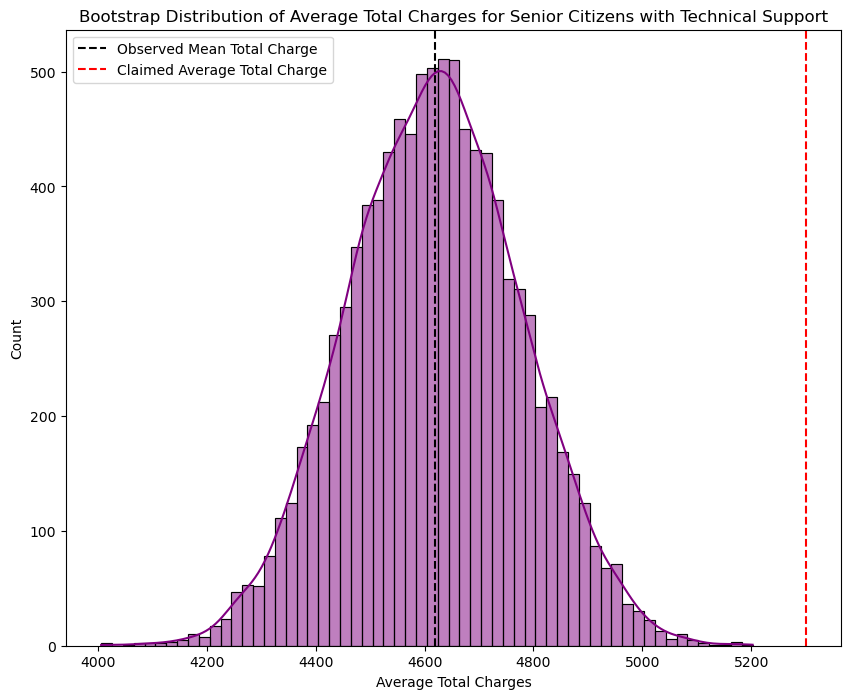

Reject the null hypothesis. There is enough evidence to suggest that the average total charge for Senior Citizens with Technical Support is not equal to $5300.


In [5]:
# Set seed for reproducibility
np.random.seed(42)

# Filtering the data 
filtered_data = telecom_data[(telecom_data['SeniorCitizen'] == 1) & (telecom_data['TechSupport'] == 'Yes')].dropna(subset=['TotalCharges'])
filtered_data['TotalCharges'] = pd.to_numeric(filtered_data['TotalCharges'], errors='coerce')

# Set claimed average total charge
claimed_average = 5300

# Set number of bootstrap samples
num_bootstrap_samples = 10000

# Simulate
simulated_means = []
for _ in range(num_bootstrap_samples):
    simulated_sample = np.random.choice(filtered_data['TotalCharges'], size=len(filtered_data), replace=True)
    simulated_means.append(np.mean(simulated_sample))

# Convert to NumPy array
simulated_means = np.array(simulated_means)

# Calculate p-value
observed_mean = np.mean(filtered_data['TotalCharges'])
p_value = np.sum(np.abs(simulated_means - observed_mean) >= np.abs(simulated_means - claimed_average)) / num_bootstrap_samples

print(f'\033[1mObserved Mean:\033[0m {observed_mean:.4f}')
print(f'\033[1mP-value:\033[0m {p_value:.4f}')

# Visualization
plt.figure(figsize=(10, 8))
sns.histplot(simulated_means, kde=True, color='purple')
plt.axvline(x=observed_mean, color='black', linestyle='--', label='Observed Mean Total Charge')
plt.axvline(x=claimed_average, color='red', linestyle='--', label='Claimed Average Total Charge')
plt.title('Bootstrap Distribution of Average Total Charges for Senior Citizens with Technical Support')
plt.xlabel('Average Total Charges')
plt.legend()
plt.show()

# Conclusion
if p_value < 0.05:
    print("\033[1mReject the null hypothesis. There is enough evidence to suggest that the average total charge for Senior Citizens with Technical Support is not equal to $5300.\033[0m")
else:
    print("\033[1mFail to reject the null hypothesis. There is not enough evidence to suggest that the average total charge for Senior Citizens with Technical Support is not equal to $5300.\033[0m")

#### 2. Verify whether customers that don't use monthly subscription contracts have an estimate monthly charge of `23` (USD)

**Null Hypothesis (H0)**: The average monthly charge for customers who don't use monthly subscription contracts is equal to 23 USD (μ = 23 USD).

**Alternative Hypothesis (H1)**: The average monthly charge for customers who don't use monthly subscription contracts is not equal to 23 USD (μ ≠ 23 USD).

Observed Mean: 64.8022
P-value: 1.0000


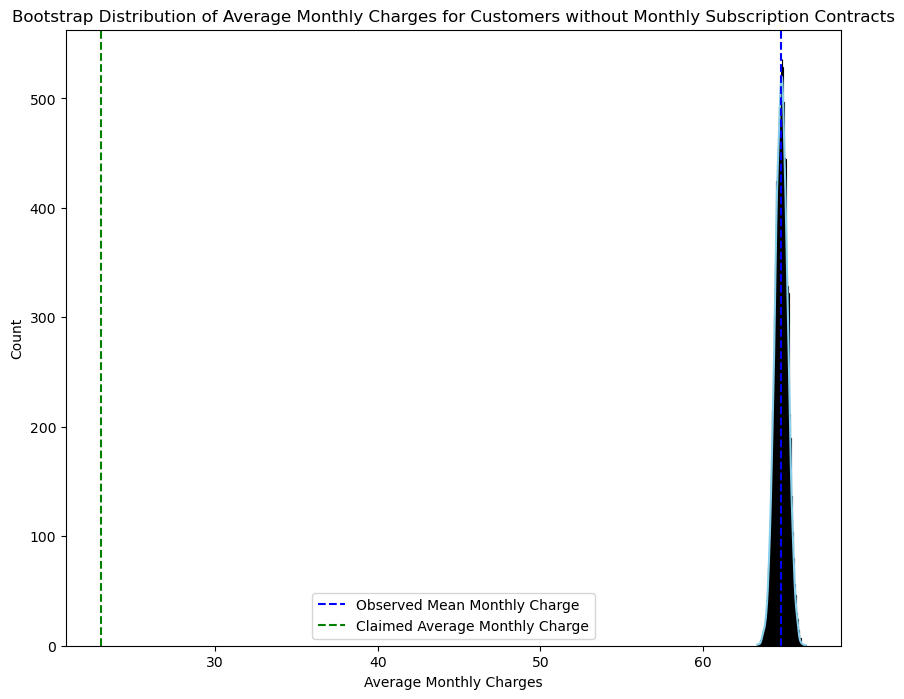

Fail to reject the null hypothesis. There is not enough evidence to suggest that the average monthly charge for customers who don't use monthly subscription contracts is not equal to $23.


In [6]:
# Set seed for reproducibility
np.random.seed(42)

# Set claimed average monthly charge
claimed_average = 23

# Set number of bootstrap samples
num_bootstrap_samples = 10500

# Simulate
simulated_means = []
for _ in range(num_bootstrap_samples):
    simulated_sample = np.random.choice(telecom_data['MonthlyCharges'], size=len(telecom_data), replace=True)
    simulated_means.append(np.mean(simulated_sample))

# Convert to NumPy array
simulated_means = np.array(simulated_means)

# Calculate p-value
observed_mean = np.mean(telecom_data['MonthlyCharges'])
p_value = np.sum(np.abs(simulated_means - claimed_average) >= np.abs(simulated_means - observed_mean)) / num_bootstrap_samples

print(f'\033[1mObserved Mean:\033[0m {observed_mean:.4f}')
print(f'\033[1mP-value:\033[0m {p_value:.4f}')

# Visualization
plt.figure(figsize=(10, 8))
sns.histplot(simulated_means, kde=True, color='skyblue')
plt.axvline(x=observed_mean, color='blue', linestyle='--', label='Observed Mean Monthly Charge')
plt.axvline(x=claimed_average, color='green', linestyle='--', label='Claimed Average Monthly Charge')
plt.title('Bootstrap Distribution of Average Monthly Charges for Customers without Monthly Subscription Contracts')
plt.xlabel('Average Monthly Charges')
plt.legend()
plt.show()

# Conclusion
if p_value < 0.05:
    print("\033[1mReject the null hypothesis. There is enough evidence to suggest that the average monthly charge for customers who don't use monthly subscription contracts is not equal to $23.\033[0m")
else:
    print("\033[1mFail to reject the null hypothesis. There is not enough evidence to suggest that the average monthly charge for customers who don't use monthly subscription contracts is not equal to $23.\033[0m")

#### 3. Check whether there is a difference in the total charges between males who churned and not churned

*Note: Exclude the data points containing `NA` values in the test*

**Null Hypothesis (H0)**: There is no difference in total charges between males who churned and not churned.

**Alternative Hypothesis (H1)**: There is a difference in total charges between males who churned and not churned.

Observed Mean: -904.8622
P-value: 0.0014


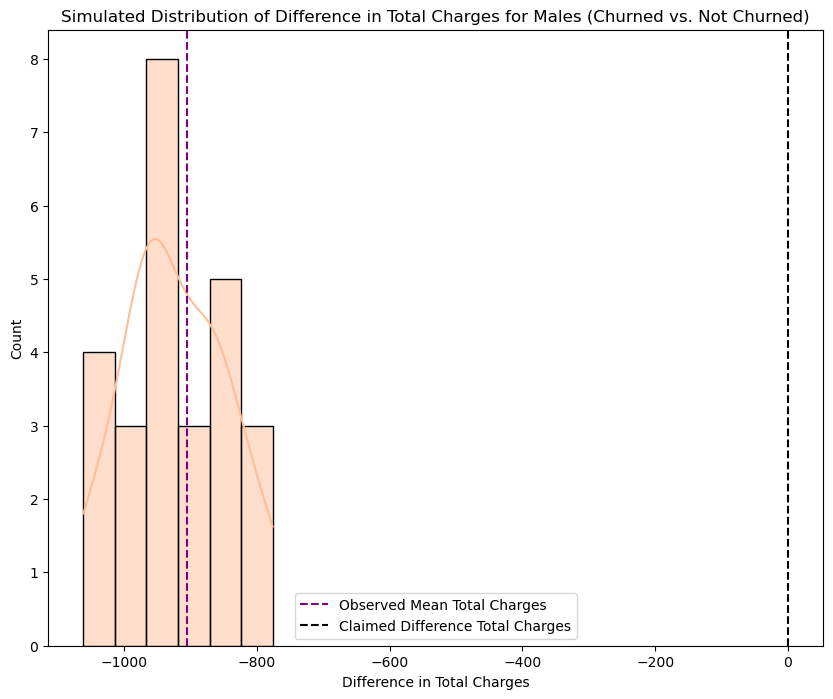

Reject the null hypothesis. There is enough evidence to suggest that there is a difference in total charges between males who churned and those who did not churn.


In [7]:
# Set seed for reproducibility
np.random.seed(42)

# Filtering the data 
filtered_data = telecom_data.dropna(subset=['TotalCharges'])
males_churned = filtered_data[(filtered_data['gender'] == 'Male') & (filtered_data['Churn'] == 'Yes')]['TotalCharges']
males_not_churned = filtered_data[(filtered_data['gender'] == 'Male') & (filtered_data['Churn'] == 'No')]['TotalCharges']

# Convert 'TotalCharges' to numeric type
males_churned = pd.to_numeric(males_churned, errors='coerce')
males_not_churned = pd.to_numeric(males_not_churned, errors='coerce')

# Set claimed difference in average total charges
claimed_difference = 0

# Set number of simulations
num_simulations = 11000

# Simulate
simulated_differences = []
for _ in range(num_simulations):
    simulated_churned_sample = np.random.choice(males_churned, size=len(males_churned), replace=True)
    simulated_not_churned_sample = np.random.choice(males_not_churned, size=len(males_not_churned), replace=True)
    simulated_difference = np.mean(simulated_churned_sample) - np.mean(simulated_not_churned_sample)
    simulated_differences.append(simulated_difference)

# Calculate p-value
observed_mean = np.mean(males_churned) - np.mean(males_not_churned)
p_value = np.sum(np.abs(simulated_differences) >= np.abs(observed_mean)) / num_simulations

print(f'\033[1mObserved Mean:\033[0m {observed_mean:.4f}')
print(f'\033[1mP-value:\033[0m {p_value:.4f}')

# Visualization
plt.figure(figsize=(10, 8))
sns.histplot(simulated_differences, kde=True, color='#FFBE98')
plt.axvline(x=observed_mean, color='purple', linestyle='--', label='Observed Mean Total Charges')
plt.axvline(x=claimed_difference, color='black', linestyle='--', label='Claimed Difference Total Charges')
plt.title('Simulated Distribution of Difference in Total Charges for Males (Churned vs. Not Churned)')
plt.xlabel('Difference in Total Charges')
plt.legend()
plt.show()

# Conclusion
if p_value < 0.05:
    print("\033[1mReject the null hypothesis. There is enough evidence to suggest that there is a difference in total charges between males who churned and those who did not churn.\033[0m")
else:
    print("\033[1mFail to reject the null hypothesis. There is not enough evidence to suggest that there is a difference in total charges between males who churned and those who did not churn.\033[0m")

#### 4. Using the given dataset, provide a pair of samples that shows significant difference in their means of monthly charges

In this task, you have to provide a subset sample from the dataset that characterizes their difference of means in monthly charges.

For example: Difference of Monthly charges between Senior Citizens who has an internet service subscription and who hasn't.

*Note: Previous items (1) (2) (3) and the given example above cannot be reused (if applicable)*

**Null Hypothesis (H0)**: There is no significant difference in the means of monthly charges between females with and without an internet service subscription.

**Alternative Hypothesis (H1)**: There is a significant difference in the means of monthly charges between females with and without an internet service subscription.

Observed Mean: 56.1097
P-value: 0.4960


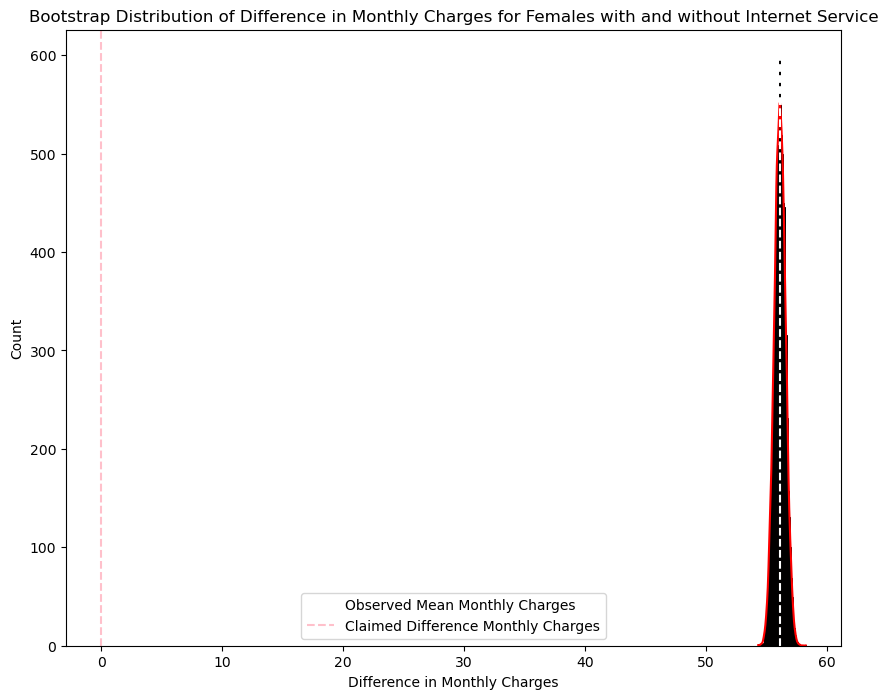

Fail to reject the null hypothesis. There is not enough evidence to suggest that there is a significant difference in means of monthly charges between females with and without an internet service subscription.


In [8]:
# Set seed for reproducibility
np.random.seed(42)

# Filtering the data 
filtered_data = telecom_data.dropna(subset=['MonthlyCharges'])
females_with_internet = filtered_data[(filtered_data['gender'] == 'Female') & (filtered_data['InternetService'] != 'No')]['MonthlyCharges']
females_without_internet = filtered_data[(filtered_data['gender'] == 'Female') & (filtered_data['InternetService'] == 'No')]['MonthlyCharges']

# Set claimed difference in average total charges
claimed_difference = 0

# Set number of bootstrap samples
num_bootstrap_samples = 12000

# Simulate
simulated_differences = []
for _ in range(num_bootstrap_samples):
    simulated_with_internet = np.random.choice(females_with_internet, size=len(females_with_internet), replace=True)
    simulated_without_internet = np.random.choice(females_without_internet, size=len(females_without_internet), replace=True)
    simulated_difference = np.mean(simulated_with_internet) - np.mean(simulated_without_internet)
    simulated_differences.append(simulated_difference)

# Convert to NumPy array
simulated_differences = np.array(simulated_differences)

# Calculate p-value
observed_mean = np.mean(females_with_internet) - np.mean(females_without_internet)
p_value = np.sum(np.abs(simulated_differences) >= np.abs(observed_mean)) / num_bootstrap_samples

print(f'\033[1mObserved Mean:\033[0m {observed_mean:.4f}')
print(f'\033[1mP-value:\033[0m {p_value:.4f}')

# Visualization
plt.figure(figsize=(10, 8))
sns.histplot(simulated_differences, kde=True, color='red')
plt.axvline(x=observed_mean, color='white', linestyle='--', label='Observed Mean Monthly Charges')
plt.axvline(x=claimed_difference, color='pink', linestyle='--', label='Claimed Difference Monthly Charges')
plt.title('Bootstrap Distribution of Difference in Monthly Charges for Females with and without Internet Service')
plt.xlabel('Difference in Monthly Charges')
plt.legend()
plt.show()

# Conclusion
if p_value < 0.05:
    print("\033[1mReject the null hypothesis. There is enough evidence to suggest that there is a significant difference in means of monthly charges between females with and without an internet service subscription.\033[0m")
else:
    print("\033[1mFail to reject the null hypothesis. There is not enough evidence to suggest that there is a significant difference in means of monthly charges between females with and without an internet service subscription.\033[0m")